In [1]:
import numpy as np
from scipy.integrate import simps
from astropy.io import fits
import matplotlib.pyplot as plt
import os
import pandas as pd

In [67]:
os.chdir('e:/Observations/BTA/s091021/MTDra/')

In [32]:
files = [file for file in os.listdir() if ('MTDra' in file) and ('.fts' in file) and ('gauss' not in file)]

In [73]:
files = [file for file in os.listdir() if 'gauss.fts' in file]

In [42]:
files

['MTDra_204615_gauss.fts',
 'MTDra_210459_gauss.fts',
 'MTDra_212121_gauss.fts',
 'MTDra_213251_gauss.fts',
 'MTDra_214825_gauss.fts',
 'MTDra_220036_gauss.fts',
 'MTDra_221211_gauss.fts',
 'MTDra_222525_gauss.fts',
 'MTDra_223644_gauss.fts',
 'MTDra_225203_gauss.fts',
 'MTDra_230504_gauss.fts',
 'MTDra_231826_gauss.fts',
 'MTDra_233140_gauss.fts',
 'MTDra_234509_gauss.fts',
 'MTDra_235820_gauss.fts',
 'MTDra_241140_gauss.fts',
 'MTDra_242459_gauss.fts',
 'MTDra_243639_gauss.fts']

In [74]:
lamS, fl = np.loadtxt('MTDra_204615.txt', unpack=True)

In [6]:
lamF_B,filt_B = np.loadtxt('c:/Users/gamak/Documents/Papers/MT_Dra/Bessel_B-1.txt'  ,unpack=True)
lamF_g,filt_g = np.loadtxt('c:/Users/gamak/Documents/Papers/MT_Dra/Sloan_g.txt'  ,unpack=True)

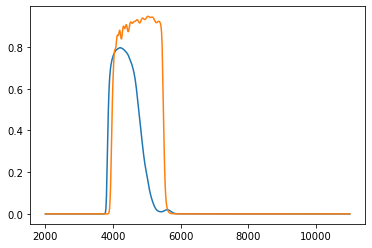

In [7]:
plt.plot(lamF_B*10,filt_B/100)
plt.plot(lamF_g*10,filt_g/100)

In [8]:
c_AAs     = 2.99792458e18                          # Speed of light in Angstrom/s

In [75]:
del(mags)

In [76]:
mags = pd.DataFrame(columns=['B','g'])

In [77]:
for file in files:
    spec = fits.getdata(file)
    filt_int  = np.interp(lamS,lamF_B*10,filt_B/100)              #Interpolate to common wavelength axis
    I1        = simps(spec*filt_int*lamS,lamS)                     #Denominator
    I2        = simps(filt_int/lamS,lamS)                     #Numerator
    fnu       = I1/I2 / c_AAs                          #Average flux density
    mAB       = -2.5*np.log10(fnu) - 48.6              #AB magnitude
    filt_int1  = np.interp(lamS,lamF_g*10,filt_g/100)              #Interpolate to common wavelength axis
    I3        = simps(spec*filt_int1*lamS,lamS)                     #Denominator
    I4        = simps(filt_int1/lamS,lamS)                     #Numerator
    fnu1       = I3/I4 / c_AAs                          #Average flux density
    mABg       = -2.5*np.log10(fnu1) - 48.6              #AB magnitude
    mags = mags.append({'B': mAB,'g': mABg}, ignore_index=True)

In [78]:
JD = pd.read_csv('../JD.dat',header=None)

In [79]:
phase = pd.read_csv('../phase_all.dat', header=None)

In [97]:
def my_plotter(ax, data1, data2, param_dict):
    """
    A helper function to make a graph.
    """
    out = ax.plot(data1, data2, **param_dict)
    return out

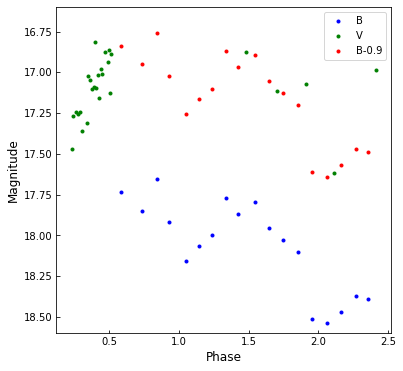

In [149]:
fig, ax = plt.subplots(figsize=(6,6))
ax.plot(phase,mags.g,'.b', label='B')
ax.plot(phase_phot,phot.cv,'.g', label='V')
ax.plot(phase,mags.g-.9,'.r', label='B-0.9')
ax.set_ylim(18.6,16.6)
ax.set_xlabel('Phase', size=12)
ax.set_ylabel('Magnitude', size=12)
ax.tick_params(direction='in')
ax.legend(loc='upper right')

In [69]:
phot = pd.read_csv('../MTDra_phot/phot.txt')

In [72]:
phase_phot = pd.read_csv('../MTDra_phot/phase_all.dat', header=None)

In [168]:
def my_plot(ax, data,  ymin, ymax, fsize=6, xtit='x_title', ytit='y_title'):
    fig, ax = plt.subplots(figsize=(fsize,fsize))
    out = ax.plot(data[0],data[1],'.b', label='B')
    ax.set_ylim(ymax,ymin)
    ax.set_xlabel(xtit, size=12)
    ax.set_ylabel(ytit, size=12)
    ax.tick_params(direction='in')
    ax.legend(loc='upper right')
    return out

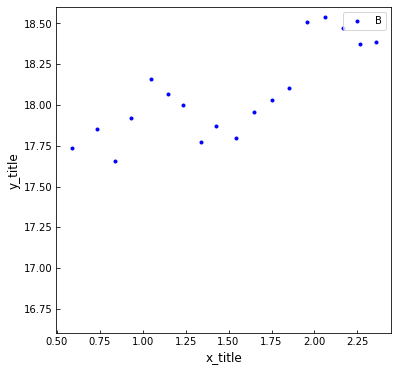

In [172]:
my_plot(ax, [phase, mags.g], 18.6, 16.6, fsize=6, xtit='x_title', ytit='y_title')
ax.plot(phase_phot,phot.cv,'.g', label='V')

In [173]:
os.chdir('e:/Observations/BTA/s080502/MTDra/')
files = [file for file in os.listdir() if 'gauss.fts' in file]

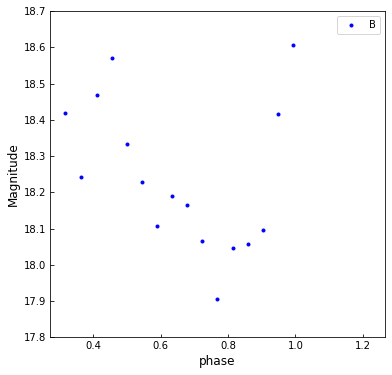

In [178]:
lamS, fl = np.loadtxt('MT Dra_021413.txt', unpack=True)
del(mags)
mags = pd.DataFrame(columns=['B','g'])
for file in files:
    spec = fits.getdata(file)
    filt_int  = np.interp(lamS,lamF_B*10,filt_B/100)              #Interpolate to common wavelength axis
    I1        = simps(spec*filt_int*lamS,lamS)                     #Denominator
    I2        = simps(filt_int/lamS,lamS)                     #Numerator
    fnu       = I1/I2 / c_AAs                          #Average flux density
    mAB       = -2.5*np.log10(fnu) - 48.6              #AB magnitude
    filt_int1  = np.interp(lamS,lamF_g*10,filt_g/100)              #Interpolate to common wavelength axis
    I3        = simps(spec*filt_int1*lamS,lamS)                     #Denominator
    I4        = simps(filt_int1/lamS,lamS)                     #Numerator
    fnu1       = I3/I4 / c_AAs                          #Average flux density
    mABg       = -2.5*np.log10(fnu1) - 48.6              #AB magnitude
    mags = mags.append({'B': mAB,'g': mABg}, ignore_index=True)
JD = pd.read_csv('../JD.dat',header=None)
phase = pd.read_csv('../phase_all.dat', header=None)
my_plot(ax, [phase, mags.g], 18.7, 17.8, fsize=6, xtit='phase', ytit='Magnitude')